#### Setup

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from scipy.io import arff


# Load the dataset
data = arff.loadarff('../data/column_diagnosis.arff')
df = pd.DataFrame(data[0])

X = df.drop('class', axis=1)
y = df['class'].astype(str)

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

#### 1) [3v] Compare the performance of 𝑘NN with 𝑘 = 5 and naïve Bayes with Gaussian assumption (consider all remaining parameters for each classifier as sklearn’s default):

>a. Plot two boxplots with the fold accuracies for each classifier.

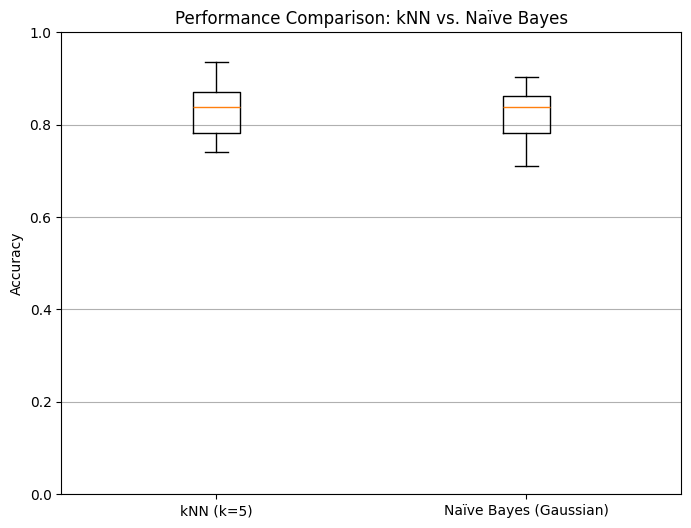

In [3]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()

knn_scores = cross_val_score(knn_classifier, X, y, cv=folds)
nb_scores = cross_val_score(nb_classifier, X, y, cv=folds)

plt.figure(figsize=(8, 6))
plt.boxplot([knn_scores, nb_scores], labels=['kNN (k=5)', 'Naïve Bayes (Gaussian)'])
plt.title('Performance Comparison: kNN vs. Naïve Bayes')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


>b. Using scipy, test the hypothesis “𝑘NN is statistically superior to naïve Bayes regarding
accuracy”, asserting whether is true.

In [7]:
# Compare the two classifiers using a paired t-test
t_statistic, p_value = stats.ttest_rel(knn_scores, nb_scores, alternative='greater')

alpha = 0.05

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")
if p_value < alpha:
    print(p_value, "<", alpha)
    print("Reject the null hypothesis")
    print("kNN is statistically superior to Naïve Bayes regarding accuracy")
else:
    print(p_value, ">=", alpha)
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in accuracy between kNN and Naïve Bayes")


t-statistic: 0.9214426752509264
p-value: 0.19042809062064092
0.19042809062064092 >= 0.05
Fail to reject the null hypothesis
There is no significant difference in accuracy between kNN and Naïve Bayes


#### 2) [2.5v] Consider two 𝑘NN predictors with 𝑘 = 1 and 𝑘 = 5 (uniform weights, Euclidean distance, all remaining parameters as default). Plot the differences between the two cumulative confusion matrices of the predictors. Comment.

Text(0, 0.5, 'Real Values')

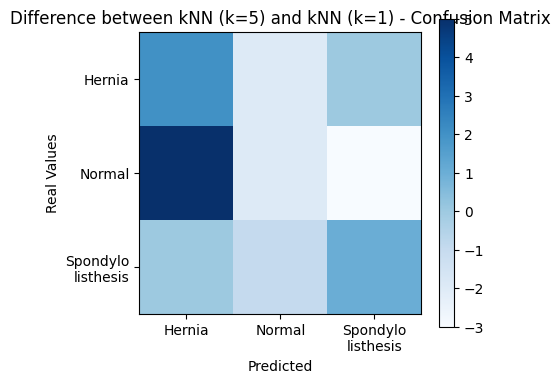

In [5]:
# Initialize variables
knn_1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn_5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

cm_1 = np.zeros((3, 3))

for train_index, test_index in folds.split(X, y):
    train_index = train_index.astype(int)
    test_index = test_index.astype(int)

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_1.fit(X_train, y_train)
    knn_5.fit(X_train, y_train)
    
    y_pred_1 = knn_1.predict(X_test)
    y_pred_5 = knn_5.predict(X_test)
    
    cm_1 += confusion_matrix(y_test, y_pred_5) - confusion_matrix(y_test, y_pred_1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Difference between kNN (k=5) and kNN (k=1) - Confusion Matrix")
plt.imshow(cm_1, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1, 2], labels=['Hernia', 'Normal', 'Spondylo\nlisthesis'])
plt.yticks([0, 1, 2], labels=['Hernia', 'Normal', 'Spondylo\nlisthesis'])
plt.xlabel("Predicted")
plt.ylabel("Real Values")


**The comparison between the cumulative confusion matrices for $k = 5$ and $k = 1$ reveals similar results.**

**The most notable difference is that when $k = 5$, there are more instances where Hernias are predicted instead of Normal, whereas when $k = 1$, there are more instances where Spondylolisthesis is predicted instead of Normal. Being these differences practically irrelevant when compared to the sample size**

**Taking these observations into account, we can conclude that the choice of the $k$ value does not significantly impact the overall performance of the $k$-Nearest Neighbors ($k$NN) classifiers in this particular context.**

<br>

#### 3) [1.5v] Considering the unique properties of column_diagnosis, identify three possible difficulties of naïve Bayes when learning from the given dataset.

**First, by using naïve Bayes, we are assuming that all variables are independent, which for our specific case may not be true. For example, "Pelvic tilt and sacral slope are two angles directly correlated with the pelvic incidence angle"**<a href= "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3175921/#:~:text=Pelvic%20tilt%20and%20sacral%20slope%20are%20two%20angles%20directly%20correlated,and%20the%20CS%20segment%20(Fig."> (click to open the source) </a>

**Secondly, we are assuming that all features have equal significance, which may not reflect reality. For instance, the 'degree_spondylolisthesis' feature could potentially hold more predictive weight than 'lumbar_lordosis_angle' when it comes to diagnosing the condition.**

**Finally, we are assuming all the features in our dataset follow a Gaussian distribuiton. If the variables do not fit well with a Gaussian, Naïve Bayes may yield suboptimal results.**
**For instance, when plotting the variable 'degree_spondylolisthesis,' there is a lot of deviation from a perfect Gaussian distribution, suggesting that the Gaussian Naïve Bayes assumption may not fully capture the underlying data distribution, potentially leading to worse modeling results.**

<img src="../data/gaussian_dist.png" />
